# **DEFENDING STATISTICS**

   These are statistics of players around the wolrd.It comprises of statistics of defending abilities like: ball recoveries, clearance, tackles and won and lost. 

These project focuses on analyses of the players data and prediction of the players position.

* Serial no : The rank position of each players.(int)
* Player name :The name of each players.(str)
* Club: The clubs name, there are 32 different club available.(str)
* Position : The position/role of the the players on the field.(str)
* Balls recoverd : The number of balls recoverd for each player.(int)
* Tackles : The number of tackles made by each players.(int)
* Tackles won (**t_won**) : The number of successful tackles made by each player.(int)
* Tackles lost (**t_lost**) : The number of failed tackles made by the players.(int)
* Clearance attempted : The number of clearance attempted by each player.(int)
* Match played : The number of match played by each player.(int)

In [1]:
#importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data in dataframe
df= pd.read_csv("defending.csv")
display(df.head())
df.shape

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


(627, 10)

In [3]:
df.describe()

,serial,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
count,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000
mean,304.298246,16.406699,4.732057,2.068581,2.663477,6.314195,5.472089
std,174.780489,14.760673,5.012920,2.607452,2.915200,8.458044,2.548652
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,154.500000,5.000000,1.000000,0.000000,1.000000,1.000000,4.000000
50%,300.000000,12.000000,3.000000,1.000000,2.000000,3.000000,5.000000
75%,448.000000,24.500000,7.000000,3.000000,4.000000,8.000000,7.000000
max,578.000000,76.000000,35.000000,18.000000,19.000000,62.000000,13.000000


In [4]:
df.isnull().sum()

serial                 0
player_name            0
club                   0
position               0
balls_recoverd         0
tackles                0
t_won                  0
t_lost                 0
clearance_attempted    0
match_played           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   serial               627 non-null    int64 
 1   player_name          627 non-null    object
 2   club                 627 non-null    object
 3   position             627 non-null    object
 4   balls_recoverd       627 non-null    int64 
 5   tackles              627 non-null    int64 
 6   t_won                627 non-null    int64 
 7   t_lost               627 non-null    int64 
 8   clearance_attempted  627 non-null    int64 
 9   match_played         627 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 49.1+ KB


In [6]:
#check if there are duplicated players 
dup_col= df.duplicated(['player_name', 'club'], keep=False)
df[dup_col].sort_values(by='player_name')

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played


The data does not have any missing values and it has **627 rows or observations** and also **10 columns or attributes** of different players. But there are some players with 0 tackles, t_won, t_lost and clearance attempted which we will discoverd the reason for this later. 

In [7]:
df[df.tackles == 0]

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
28,27,Koundé,Sevilla,Defender,48,0,0,0,15,5
88,82,Varane,Man. United,Defender,34,0,0,0,18,5
177,166,Calabria,Milan,Defender,23,0,0,0,11,4
262,250,Jesús Navas,Sevilla,Defender,15,0,0,0,5,4
282,264,Gomez,Liverpool,Defender,14,0,0,0,5,7
...,...,...,...,...,...,...,...,...,...,...
622,578,Maier,Young Boys,Midfielder,1,0,0,0,0,1
623,578,Zhegrova,LOSC,Midfielder,1,0,0,0,0,1
624,578,Zesiger,Young Boys,Defender,1,0,0,0,0,1
625,578,Zakaria,Juventus,Midfielder,1,0,0,0,0,1


We have 90 players with zero tackles,t_won, t_lost. Since players with zero tackles will definitely have zero tackle won and lost.

In [8]:
clear_no= df[df.clearance_attempted == 0]
clear_no.position.value_counts()

Midfielder    57
Forward       48
Defender      16
Name: position, dtype: int64

In [9]:
#defenders with zero taclkes
def0 = clear_no[clear_no.position =='Defender']
display(def0)

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
325,317,Dest,Barcelona,Defender,11,3,3,0,0,4
329,317,Mingueza,Barcelona,Defender,11,2,1,1,0,5
354,337,Schulz,Dortmund,Defender,10,2,0,2,0,4
411,404,D'Ambrosio,Inter,Defender,7,3,1,2,0,3
426,404,Krugovoi,Zenit,Defender,7,0,0,0,0,6
460,448,Augustinsson,Sevilla,Defender,5,2,0,2,0,3
464,448,De Winter,Juventus,Defender,5,1,1,0,0,2
472,448,Rekik,Sevilla,Defender,5,1,0,1,0,4
523,507,Flávio Nazinho,Sporting CP,Defender,3,1,1,0,0,2
529,507,Mbamba-Muanda,Club Brugge,Defender,3,1,0,1,0,3


There are **121 players** with zero clearance attempted. The players are **majorly forward and midfield players**, which is what we expected. **57** players are midfielder, **48** are forward players, while **16** of them are defenders.

In [10]:
#check for unique clubs and players position
df.iloc[:, 2:4].nunique()

club        32
position     3
dtype: int64

The result above shows that there are 32 different clubs and of three positions on the field of play.

In [11]:
#check for the count of different position
df_pos=df.position
df_pos.value_counts()

Midfielder    262
Defender      239
Forward       126
Name: position, dtype: int64

In [12]:
#the percentage for each position
df_pos.value_counts(normalize= True)

Midfielder    0.417863
Defender      0.381180
Forward       0.200957
Name: position, dtype: float64

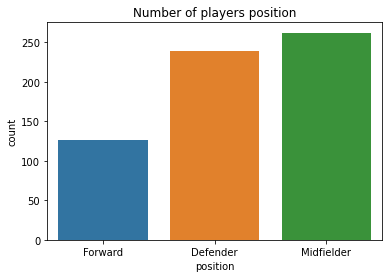

In [13]:
cat_order= ['Forward', 'Defender', 'Midfielder']
sns.countplot(x=df_pos, data =df,order= cat_order)
plt.title("Number of players position")
plt.show()

The result abive shows that **midfielders** have the highest numbers, followed by defenders and forwards has the lowest numbers of defending which is expected.

In [14]:
fowards= df[df.position == 'Forward']
display(fowards)
fowards.club.value_counts().count()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
123,121,Vinícius Júnior,Real Madrid,Forward,29,11,3,8,0,13
153,151,Antony,Ajax,Forward,25,7,3,4,2,7
189,189,Rafa Silva,Benfica,Forward,21,12,6,6,1,9
196,189,João Mário,Porto,Forward,21,1,0,1,6,4
197,198,Griezmann,Atlético,Forward,20,14,6,8,5,9
...,...,...,...,...,...,...,...,...,...,...
615,578,Olmo,Leipzig,Forward,1,0,0,0,0,2
617,578,Kuznetsov,Zenit,Forward,1,0,0,0,0,1
619,578,Moukoko,Dortmund,Forward,1,0,0,0,0,1
620,578,Delap,Man. City,Forward,1,0,0,0,0,1


32

In [15]:
defends = df[df.position == 'Defender']
top_def= defends.club.value_counts().sort_values(ascending = False)
top_def.head(10)

Atalanta       9
Chelsea        9
Liverpool      9
Milan          9
Man. United    9
Sporting CP    9
Dortmund       8
Villarreal     8
Man. City      8
Inter          8
Name: club, dtype: int64

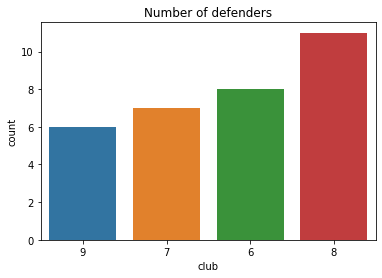

In [16]:
cat= [9, 7, 6, 8]
sns.countplot(x= top_def, data= df, order= cat)
plt.title("Number of defenders")
plt.show()

In [17]:
df_grp=df.groupby('club').balls_recoverd.mean()
top_club= df_grp.sort_values(ascending= False).head(10)
top_club

club
Real Madrid    24.476190
Liverpool      24.083333
Atlético       23.700000
Bayern         23.105263
Man. City      21.333333
Villarreal     21.000000
Benfica        20.526316
Salzburg       19.421053
Chelsea        18.318182
Ajax           18.166667
Name: balls_recoverd, dtype: float64

The result above shows the **top ten clubs with average number of ball recoverd**. Real Madrid and Liverpool have ball recoverd with 24.48 and 24.1 respectively, and the lowest are Chelsea and Ajax with 18.32 and 18.17 respectively

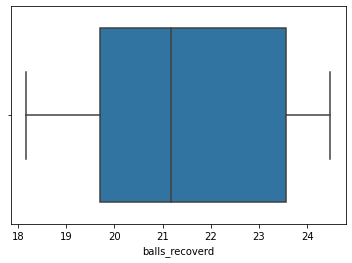

In [18]:
sns.boxplot(data=df, x= top_club)
plt.show()

In [19]:
df_num= df.iloc[:, 4:]
df_num

,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,76,31,13,18,19,11
1,76,19,6,13,32,12
2,76,13,6,7,20,10
3,74,23,9,14,8,13
4,73,9,6,3,62,12
...,...,...,...,...,...,...
622,1,0,0,0,0,1
623,1,0,0,0,0,1
624,1,0,0,0,0,1
625,1,0,0,0,0,1


In [20]:
df_num.mean()

balls_recoverd         16.406699
tackles                 4.732057
t_won                   2.068581
t_lost                  2.663477
clearance_attempted     6.314195
match_played            5.472089
dtype: float64

In [21]:
df_num.median()

balls_recoverd         12.0
tackles                 3.0
t_won                   1.0
t_lost                  2.0
clearance_attempted     3.0
match_played            5.0
dtype: float64

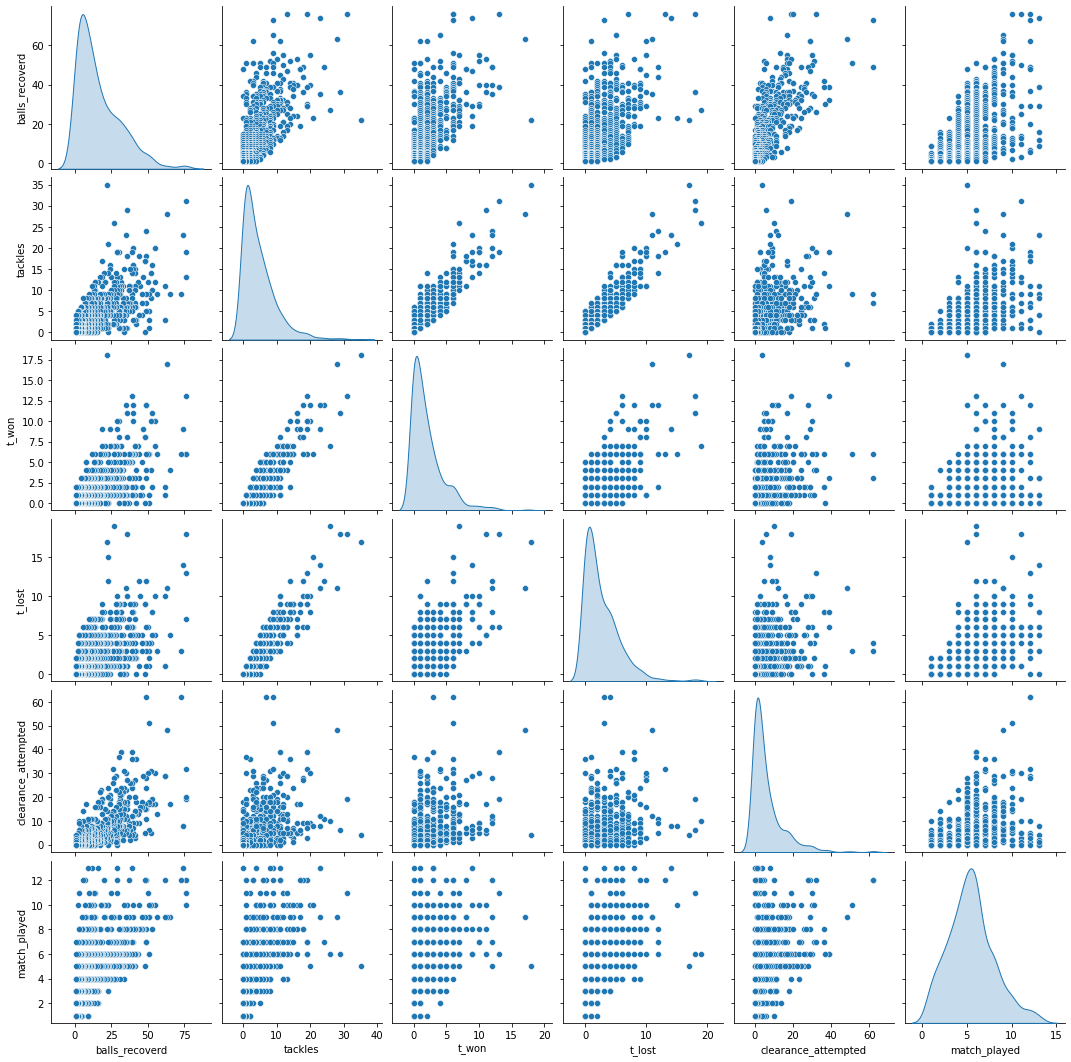

In [22]:
sns.pairplot(data=df_num, diag_kind= 'kde')
plt.show()

From the pair plot above, most of the numerical data are not normal distribution. Only matched played is a normal distribution, others are right skeweddue to outliers.

In [23]:
#function for ranking player
def top_player(b):
    """sort the highest given column"""
    a= df.sort_values(b, ascending = False).head(10)
    return a
#players with highest ball recoverd 
top_player('balls_recoverd')

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
5,6,Thiago Silva,Chelsea,Defender,65,9,4,5,17,9
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
7,8,Capoue,Villarreal,Midfielder,62,11,1,10,29,12
8,8,Van Dijk,Liverpool,Defender,62,3,2,1,29,9
9,10,João Cancelo,Man. City,Defender,56,9,6,3,13,9


In [24]:
#players with highest tackles
top_player('tackles')

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
178,179,Verratti,Paris,Midfielder,22,35,18,17,4,5
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
69,70,João Palhinha,Sporting CP,Midfielder,36,29,11,18,6,6
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
137,138,Addo,Sheriff,Midfielder,27,26,7,19,10,6
21,22,André,LOSC,Midfielder,49,24,12,12,11,7
75,76,Weigl,Benfica,Midfielder,35,23,12,11,12,9
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
165,166,Renan Lodi,Atlético,Defender,23,21,6,15,8,10
48,49,Souza,Beşiktaş,Midfielder,40,20,12,8,9,5


In [25]:
#players with highest tackles won
top_player('t_won')

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
178,179,Verratti,Paris,Midfielder,22,35,18,17,4,5
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
53,54,Fernando Costanza,Sheriff,Defender,39,19,13,6,39,6
48,49,Souza,Beşiktaş,Midfielder,40,20,12,8,9,5
22,22,Alaba,Real Madrid,Defender,49,18,12,6,28,12
21,22,André,LOSC,Midfielder,49,24,12,12,11,7
75,76,Weigl,Benfica,Midfielder,35,23,12,11,12,9
69,70,João Palhinha,Sporting CP,Midfielder,36,29,11,18,6,6
12,13,Konaté,Liverpool,Defender,53,16,11,5,17,8


In [26]:
#players with most clearance attempted
top_player('clearance_attempted')

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
24,22,Pau Torres,Villarreal,Defender,49,7,3,4,62,12
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
16,17,Vertonghen,Benfica,Defender,51,9,6,3,51,10
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
53,54,Fernando Costanza,Sheriff,Defender,39,19,13,6,39,6
97,95,Dulanto,Sheriff,Defender,32,11,3,8,39,6
119,110,Arboleda,Sheriff,Defender,30,1,0,1,37,6
54,54,Wöber,Salzburg,Defender,39,14,6,8,36,7
39,38,Marquinhos,Paris,Defender,42,2,2,0,36,8
145,146,Kimpembe,Paris,Defender,26,9,4,5,32,7


In [27]:
#function for rating players more than one condition
def com_player(a, c):
    """sort the highest two given columns"""
    a= df.sort_values(a, ascending = False).head(10)
    c= df.sort_values(c, ascending = False).head(10)
    a_b= pd.concat([a,c], ignore_index= True)
    return a_b

#players with the most ball recoverd and tackles
dup= com_player('balls_recoverd', 'tackles')
org= dup.duplicated(subset= ['player_name', 'club'])
dup[org]

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
11,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
13,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
17,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13


In [28]:
#players with the most ball recoverd and clearance attempted
dup= com_player('balls_recoverd', 'clearance_attempted')
org= dup.duplicated(subset= ['player_name', 'club'])
dup[org]

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
11,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
13,7,Otamendi,Benfica,Defender,63,28,17,11,48,9


In [29]:
#players with the most balls recoverd and tackles won
dup= com_player('balls_recoverd', 't_won')
org= dup.duplicated(subset= ['player_name', 'club'])
dup[org]

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
11,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
12,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11


In [30]:
#players with the most tackles and clearance attempted
dup= com_player('tackles', 'clearance_attempted')
org= dup.duplicated(subset= ['player_name', 'club'])
dup[org]

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
13,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
